In [71]:
import os
import pickle
import pandas as pd
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from stable_baselines3 import DQN
from stockenv import StockTradingEnv

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



In [72]:
font = fm.FontProperties(fname='font/wqy-microhei.ttc')
# plt.rc('font', family='Source Han Sans CN')
plt.rcParams['axes.unicode_minus'] = False

In [73]:

def stock_trade(stock_file):
    day_profits = []
    df = pd.read_csv(stock_file)
    df = df.sort_values('date')

    # The algorithms require a vectorized environment to run
    env = DummyVecEnv([lambda: StockTradingEnv(df)])

    model = PPO('MlpPolicy', env, verbose=0, tensorboard_log='./log')
    model.learn(total_timesteps=int(1e4))

    df_test = pd.read_csv(stock_file.replace('train', 'test'))

    env = DummyVecEnv([lambda: StockTradingEnv(df_test)])
    obs = env.reset()
    for i in range(len(df_test) - 1):
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        profit = env.render()
        day_profits.append(profit)
        if done:
            break
    return day_profits

In [74]:

def find_file(path, name):
    # print(path, name)
    for root, dirs, files in os.walk(path):
        for fname in files:
            if name in fname:
                return os.path.join(root, fname)

In [75]:

def test_a_stock_trade(stock_code):
    stock_file = find_file('./stockdata/train', str(stock_code))

    daily_profits = stock_trade(stock_file)
    fig, ax = plt.subplots()
    ax.plot(daily_profits, '-o', label=stock_code, marker='o', ms=10, alpha=0.7, mfc='orange')
    ax.grid()
    plt.xlabel('step')
    plt.ylabel('profit')
    ax.legend(prop=font)
    # plt.show()
    #plt.savefig(f'./img/{stock_code}.png')

In [76]:
def multi_stock_trade():
    start_code = 600000
    max_num = 3000

    group_result = []

    for code in range(start_code, start_code + max_num):
        stock_file = find_file('./stockdata/train', str(code))
        if stock_file:
            try:
                profits = stock_trade(stock_file)
                group_result.append(profits)
            except Exception as err:
                print(err)

    with open(f'code-{start_code}-{start_code + max_num}.pkl', 'wb') as f:
        pickle.dump(group_result, f)

/Users/sampson/miniforge3/envs/tensorflow24/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/sampson/Desktop/800/实现项目/stockenv.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.cost_basis = (
/Users/sampson/miniforge3/envs/tensorflow24/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/sampson/Desktop/800/实现项目/stockenv.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.cost_basis = (


------------------------------
Step: 1
Balance: 2.2295758273139654
Shares held: 2939 (Total sold: 0)
Avg cost for held shares: 3.401759246060798 (Total sales value: 0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
------------------------------
Step: 2
Balance: 2.2295758273139654
Shares held: 2939 (Total sold: 0)
Avg cost for held shares: 3.401759246060798 (Total sales value: 0)
Net worth: 10095.519630953806 (Max net worth: 10095.519630953806)
Profit: 95.51963095380597
------------------------------
Step: 3
Balance: 2.2295758273139654
Shares held: 2939 (Total sold: 0)
Avg cost for held shares: 3.401759246060798 (Total sales value: 0)
Net worth: 9966.716228468738 (Max net worth: 10095.519630953806)
Profit: -33.283771531261664
------------------------------
Step: 4
Balance: 2.2295758273139654
Shares held: 2939 (Total sold: 0)
Avg cost for held shares: 3.401759246060798 (Total sales value: 0)
Net worth: 10112.763840279356 (Max net worth: 10112.763840279356)
Profit: 112.76384027935

/var/folders/px/8_6897y52cl_kz9fkqt6xpzh0000gn/T/ipykernel_64849/2683911584.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(daily_profits, '-o', label=stock_code, marker='o', ms=10, alpha=0.7, mfc='orange')


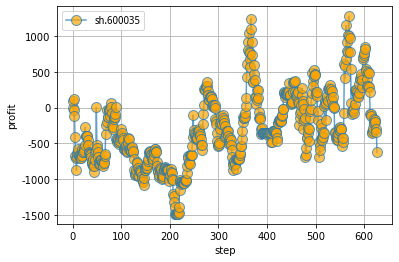

In [78]:
if __name__ == '__main__':
    # multi_stock_trade()
    test_a_stock_trade('sh.600035')
    # ret = find_file('./stockdata/train', '600036')
    # print(ret)